In [1]:
import os
import pathlib
import geopandas as gpd
import pandas as pd
import numpy as np
import json
from pathlib import Path


In [2]:
# read CMLAD geometry
geojson_path11 =  r'/Users/yuhan/Desktop/a.Cambridge/Census_UK/2.Origin-Destination-Workplace/2011_flow/CMLAD_Dec_2011_GCB_GB_2022.geojson'

CMLAD_gdf11 = gpd.read_file( geojson_path11 )
CMLAD_gdf11.drop(columns = ['OBJECTID', 'cmlad11nmw', 'GlobalID'], inplace = True)
CMLAD_gdf11['centroid_x'] = CMLAD_gdf11.geometry.centroid.x
CMLAD_gdf11['centroid_y'] = CMLAD_gdf11.geometry.centroid.y

# Inspect the GeoDataFrame
print(CMLAD_gdf11.head())
print(CMLAD_gdf11.shape)
CMLAD11_dict = CMLAD_gdf11.set_index('cmlad11cd').to_dict(orient='index')


   cmlad11cd             cmlad11nm  \
0  E41000001            Hartlepool   
1  E41000002         Middlesbrough   
2  E41000003  Redcar and Cleveland   
3  E41000004      Stockton-on-Tees   
4  E41000005            Darlington   

                                            geometry  centroid_x  centroid_y  
0  MULTIPOLYGON (((-1.27025 54.72717, -1.26822 54...   -1.259177   54.669386  
1  MULTIPOLYGON (((-1.23003 54.58411, -1.23016 54...   -1.222329   54.542015  
2  MULTIPOLYGON (((-1.13718 54.64695, -1.13875 54...   -1.020677   54.551619  
3  MULTIPOLYGON (((-1.31800 54.64527, -1.31718 54...   -1.332253   54.561822  
4  POLYGON ((-1.63768 54.61714, -1.63767 54.61670...   -1.552645   54.548714  
(346, 5)


/var/folders/t6/8gnslc_j433220_1kgd9hv_c0000gn/T/ipykernel_64127/479451127.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  CMLAD_gdf11['centroid_x'] = CMLAD_gdf11.geometry.centroid.x
/var/folders/t6/8gnslc_j433220_1kgd9hv_c0000gn/T/ipykernel_64127/479451127.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  CMLAD_gdf11['centroid_y'] = CMLAD_gdf11.geometry.centroid.y


In [3]:
# Read GLTLA geometry
geojson_path21 =  r'/Users/yuhan/Desktop/a.Cambridge/Census_UK/2.Origin-Destination-Workplace/2021_flow/GLTLA_DEC_2022_EW_BFC.geojson'

GLTLA_gdf21 = gpd.read_file( geojson_path21 )

GLTLA_gdf21['centroid_x'] = GLTLA_gdf21.geometry.centroid.x
GLTLA_gdf21['centroid_y'] = GLTLA_gdf21.geometry.centroid.y

GLTLA_gdf21['cmlad21nm'] = GLTLA_gdf21['GLTLA22NM']

# Inspect the GeoDataFrame
print(GLTLA_gdf21.columns)
print(GLTLA_gdf21.head() )
CMLAD21_dict = GLTLA_gdf21.set_index('GLTLA22CD').to_dict(orient='index')


Index(['FID', 'GLTLA22CD', 'GLTLA22NM', 'GLTLA22NMW', 'BNG_E', 'BNG_N', 'LAT',
       'LONG', 'GlobalID', 'geometry', 'centroid_x', 'centroid_y',
       'cmlad21nm'],
      dtype='object')
   FID  GLTLA22CD                     GLTLA22NM GLTLA22NMW   BNG_E   BNG_N  \
0    1  E68000001  Stockton-on-Tees, Hartlepool             444955  522016   
1    2  E68000002                 Middlesbrough             451141  516887   
2    3  E68000003          Redcar and Cleveland             464361  519597   
3    4  E68000004         Darlington, Hambleton             442799  490517   
4    5  E68000005                        Halton             354246  382146   

        LAT     LONG                              GlobalID  \
0  54.59135 -1.30583  a03d28eb-cd79-4904-a894-b6ce47d26af9   
1  54.54467 -1.21099  f82e5661-9137-45df-b61f-0feecf0296a9   
2  54.56752 -1.00608  0166cc22-052d-408e-8eb2-7007c582d4e6   
3  54.30847 -1.34372  b9bb2960-fc37-42dc-8bfb-c451567a0260   
4  53.33424 -2.68853  a5193c0b-6

<Axes: >

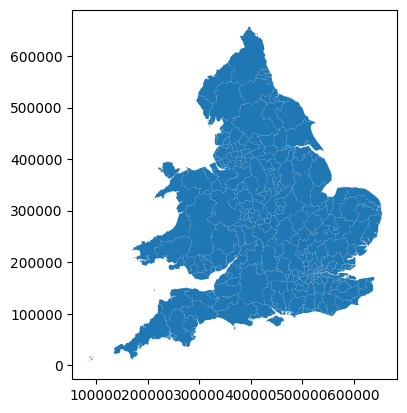

In [4]:
GLTLA_gdf21.plot()

In [5]:
# Read LAD 2024 geometry
geojson_path24 =  r'/Users/yuhan/Desktop/a.Cambridge/Census_UK/geo/Local_Authority_Districts_May_2024.geojson'

gdf2024 = gpd.read_file( geojson_path24 )

gdf2024_dict = gdf2024.set_index('LAD24CD').to_dict(orient='index')

In [6]:
# Filter Scotland LADs
filtered_scotland_gdf24 = gdf2024.loc[
    (gdf2024['LAD24CD'].str.startswith(('S'))), 
    ['LAD24CD', 'LAD24NM', 'geometry']
]
# Calculate centroids
filtered_scotland_gdf24['centroid_x'] = filtered_scotland_gdf24.geometry.centroid.x
filtered_scotland_gdf24['centroid_y'] = filtered_scotland_gdf24.geometry.centroid.y
print(filtered_scotland_gdf24.columns )
filtered_scotland_gdf24.columns = ['cmlad11cd', 'cmlad11nm', 'geometry', 
                                   'centroid_x', 'centroid_y']
#scotland21_dict = filtered_scotland_gdf24.set_index('cmlad11cd').to_dict(orient='index')
# Inspect the GeoDataFrame
print( filtered_scotland_gdf24.tail())
#print(gdf2021.columns)#
print( filtered_scotland_gdf24.shape )

Index(['LAD24CD', 'LAD24NM', 'geometry', 'centroid_x', 'centroid_y'], dtype='object')
     cmlad11cd            cmlad11nm  \
334  S12000045  East Dunbartonshire   
335  S12000047                 Fife   
336  S12000048    Perth and Kinross   
337  S12000049         Glasgow City   
338  S12000050    North Lanarkshire   

                                              geometry  centroid_x  centroid_y  
334  POLYGON ((-4.15238 56.00804, -4.15224 56.00699...   -4.225548   55.956031  
335  MULTIPOLYGON (((-3.30257 56.03094, -3.30251 56...   -3.126638   56.228521  
336  MULTIPOLYGON (((-3.26308 56.35480, -3.26660 56...   -3.824148   56.566877  
337  MULTIPOLYGON (((-4.35406 55.87277, -4.35253 55...   -4.252567   55.857826  
338  POLYGON ((-4.02012 56.02804, -4.01918 56.02675...   -3.948434   55.874828  
(32, 5)


/var/folders/t6/8gnslc_j433220_1kgd9hv_c0000gn/T/ipykernel_64127/704657951.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  filtered_scotland_gdf24['centroid_x'] = filtered_scotland_gdf24.geometry.centroid.x
/var/folders/t6/8gnslc_j433220_1kgd9hv_c0000gn/T/ipykernel_64127/704657951.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  filtered_scotland_gdf24['centroid_y'] = filtered_scotland_gdf24.geometry.centroid.y


In [7]:
# Concatenate CMLAD and filtered_scotland_gdf24
filtered_scotland_gdf24 = filtered_scotland_gdf24.to_crs( CMLAD_gdf11.crs)

#combined_gdf = gdf1.merge(gdf2, on='common_column', how='inner')  # or 'left', 'right', 'outer'

gdf2011_gdf = pd.concat([CMLAD_gdf11, filtered_scotland_gdf24], ignore_index=True)


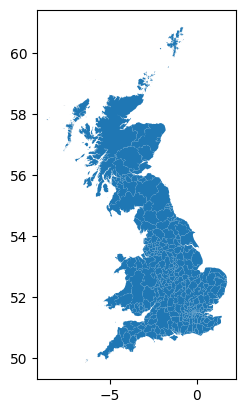

In [8]:
# Plot the combined GeoDataFrame
gdf2011_gdf.plot()
gdf2011_gdf_dict = gdf2011_gdf.set_index('cmlad11cd').to_dict(orient='index')


In [9]:
gdf2011_gdf.to_file( r'/Users/yuhan/Desktop/a.Cambridge/Census_UK/2.Origin-Destination-Workplace/2011_flow/CMLAD_Dec_2011_GB_2022_j_scotland.geojson' )
#gdf2011_gdf.to_file( r'/Users/yuhan/Desktop/a.Cambridge/Census_UK/geo/CMLAD_Dec_2011_GB_2022_j_scotland.geojson' )

In [10]:
# Dictionary to map LAD codes in Scotlands
ladnm_dict = {
    'S12000015' : 'S12000047',
    'S12000024' : 'S12000048',
    'S12000044' : 'S12000050',
    'S12000046' : 'S12000049'
}

In [40]:
# Read original downlaoded 2011 flow data
wu03uk_2011 = pd.read_csv("./2011_flow/wu03uk_v3/wu03uk_v3.csv")

wu03uk_2011 = wu03uk_2011.loc[

    ( wu03uk_2011['Area of usual residence'].str.startswith(('E', 'S', 'W')) ) &
    ( wu03uk_2011['Area of workplace'].str.startswith(('E', 'S', 'W')) )
]

wu03uk_2011.head()


,Area of usual residence,Area of workplace,All categories: Method of travel to work,Work mainly at or from home,"Underground, metro, light rail, tram",Train,"Bus, minibus or coach",Taxi,"Motorcycle, scooter or moped",Driving a car or van,Passenger in a car or van,Bicycle,On foot,Other method of travel to work
3315,E41000001,E41000001,20777,0,6,26,1922,527,107,11788,1965,593,3789,54
3316,E41000001,E41000002,1591,0,1,32,140,11,6,1225,99,13,60,4
3317,E41000001,E41000003,534,0,0,0,21,4,6,448,36,1,16,2
3318,E41000001,E41000004,3865,0,1,49,167,20,23,3144,365,29,60,7
3319,E41000001,E41000005,433,0,0,11,7,1,4,360,33,2,15,0


In [41]:
# Test the 2011 flow data with an id
wu03uk_2011.loc[ wu03uk_2011['Area of usual residence'] == 'E09000001' ]

,Area of usual residence,Area of workplace,All categories: Method of travel to work,Work mainly at or from home,"Underground, metro, light rail, tram",Train,"Bus, minibus or coach",Taxi,"Motorcycle, scooter or moped",Driving a car or van,Passenger in a car or van,Bicycle,On foot,Other method of travel to work


In [42]:
# Map LAD codes to the 2011 flow data

wu03uk_2011['Area of usual residence'] = wu03uk_2011['Area of usual residence'].map(ladnm_dict).fillna(wu03uk_2011['Area of usual residence'])
wu03uk_2011['Area of workplace'] = wu03uk_2011['Area of workplace'].map(ladnm_dict).fillna( wu03uk_2011['Area of workplace'])

# Method 2: Using replace()
# wu03uk_2011['Area of usual residence'] = wu03uk_2011['Area of usual residence'].replace(ladnm_dict)
# wu03uk_2011['Area of workplace'] = wu03uk_2011['Area of workplace'].replace(ladnm_dict)


In [44]:
# check if the LAD codes in Scotlands are in the 2011 flow data
scotland_gdf24id = filtered_scotland_gdf24.cmlad11cd.unique().tolist()
scotland_flowid = wu03uk_2011.loc[
    (wu03uk_2011['Area of usual residence'].str.startswith(('S'))), 'Area of usual residence' ].unique().tolist()

are_same = set(scotland_gdf24id) - set( scotland_flowid)
print(are_same) 

set()


In [45]:
# Create a dictionary of coordinates
def create_coords_dict(gdf_dict):
    coords_dict = {}
    for code, data in gdf_dict.items():
        coords_dict[code] = {
            'lat': data['centroid_y'],
            'lon': data['centroid_x']
        }
    return coords_dict
# Map coordinates
def map_coordinates(df, column_name, dict_map, coord_type):
    """
    Maps coordinates based on area code prefix using different dictionaries
    
    Parameters:
    df: DataFrame containing the column to map
    column_name: Name of the column containing area codes
    scotland_dict: Dictionary for Scottish areas (S prefix)
    other_dict: Dictionary for other areas
    coord_type: 'centroid_x' or 'centroid_y' to specify which coordinate to map
    
    Returns:
    Series with mapped coordinates
    """
    def get_coordinate(code):
        if pd.isna(code):
            return None
        return dict_map.get(code, {}).get(coord_type)
    
    return df[column_name].map(get_coordinate)

# Map 2011 flow data
wu03uk_2011['origin_lon'] = map_coordinates(
    wu03uk_2011, 
    'Area of usual residence', 
    gdf2011_gdf_dict,  # Scotland dictionary
    'centroid_x'
)

wu03uk_2011['origin_lat'] = map_coordinates(
    wu03uk_2011, 
    'Area of usual residence', 
    gdf2011_gdf_dict,  # Scotland dictionary
    'centroid_y'
)

wu03uk_2011['origin_nm'] = map_coordinates(
    wu03uk_2011, 
    'Area of usual residence', 
    gdf2011_gdf_dict,  # UK dictionary
    'cmlad11nm'
)

wu03uk_2011['dest_lon'] = map_coordinates(
    wu03uk_2011, 
    'Area of workplace', 
    gdf2011_gdf_dict,  # UK dictionary
    'centroid_x'
)

wu03uk_2011['dest_lat'] = map_coordinates(
    wu03uk_2011, 
    'Area of workplace', 
    gdf2011_gdf_dict,  # UK dictionary
    'centroid_y'
)

wu03uk_2011['dest_nm'] = map_coordinates(
    wu03uk_2011, 
    'Area of workplace', 
    gdf2011_gdf_dict,  # UK dictionary
    'cmlad11nm'
)

# wu03uk_2011['Orig24NM'] = wu03uk_2011['Area of usual residence'].apply(lambda x: gdf24_dict.get(x, {}).get('LAD24NM'))
# wu03uk_2011['Dest24NM'] = wu03uk_2011['Area of workplace'].apply(lambda x: gdf24_dict.get(x, {}).get('LAD24NM'))


In [46]:
wu03uk_2011.head()

,Area of usual residence,Area of workplace,All categories: Method of travel to work,Work mainly at or from home,"Underground, metro, light rail, tram",Train,"Bus, minibus or coach",Taxi,"Motorcycle, scooter or moped",Driving a car or van,Passenger in a car or van,Bicycle,On foot,Other method of travel to work,origin_lon,origin_lat,origin_nm,dest_lon,dest_lat,dest_nm
3315,E41000001,E41000001,20777,0,6,26,1922,527,107,11788,1965,593,3789,54,-1.259177,54.669386,Hartlepool,-1.259177,54.669386,Hartlepool
3316,E41000001,E41000002,1591,0,1,32,140,11,6,1225,99,13,60,4,-1.259177,54.669386,Hartlepool,-1.222329,54.542015,Middlesbrough
3317,E41000001,E41000003,534,0,0,0,21,4,6,448,36,1,16,2,-1.259177,54.669386,Hartlepool,-1.020677,54.551619,Redcar and Cleveland
3318,E41000001,E41000004,3865,0,1,49,167,20,23,3144,365,29,60,7,-1.259177,54.669386,Hartlepool,-1.332253,54.561822,Stockton-on-Tees
3319,E41000001,E41000005,433,0,0,11,7,1,4,360,33,2,15,0,-1.259177,54.669386,Hartlepool,-1.552645,54.548714,Darlington


In [9]:

wu03uk_2011_filtered_df = wu03uk_2011[ ( wu03uk_2011['Area of usual residence'].str.startswith(('E', 'S', 'W')) ) &
                          ( wu03uk_2011['Area of workplace'].str.startswith(('E', 'S', 'W')) ) ]


print(wu03uk_2011_filtered_df.shape )
wu03uk_2011_filtered_df.tail()

print( wu03uk_2011[ ( wu03uk_2011['Area of usual residence'].str.startswith(('S')) ) &
                          ( wu03uk_2011['Area of workplace'].str.startswith(('S')) ) ].head() )

wu03uk_2011_filtered_df.reset_index(drop=True).to_csv('./2011_flow/wu03uk_2011_processed.csv')


(103982, 20)
      Area of usual residence Area of workplace  \
98303               S12000005         S12000005   
98304               S12000005         S12000006   
98305               S12000005         S12000008   
98306               S12000005         S12000010   
98307               S12000005         S12000011   

       All categories: Method of travel to work  Work mainly at or from home  \
98303                                      8333                            0   
98304                                         1                            0   
98305                                         4                            0   
98306                                        16                            0   
98307                                         4                            0   

       Underground, metro, light rail, tram  Train  Bus, minibus or coach  \
98303                                     0      8                    526   
98304                                     0  

In [10]:

print("\n2011 rows with NaN coordinates:")
nan_rows_2011 = wu03uk_2011_filtered_df[ wu03uk_2011_filtered_df[['origin_lon', 'origin_lat', 'dest_lon', 'dest_lat']].isna().any(axis=1)
][['Area of usual residence', 'origin_nm', 'Area of workplace', 'dest_nm', 'origin_lon', 'origin_lat', 'dest_lon', 'dest_lat']]
nan_rows_2011




2011 rows with NaN coordinates:


,Area of usual residence,origin_nm,Area of workplace,dest_nm,origin_lon,origin_lat,dest_lon,dest_lat


In [11]:
print(nan_rows_2011.tail())

nan_values = nan_rows_2011[nan_rows_2011['dest_nm'].isna()]['Area of workplace'].unique()
print(nan_values)
nan_values2 = nan_rows_2011[nan_rows_2011['origin_nm'].isna()]['Area of usual residence'].unique()
print(nan_values2)

#print(scotland21_dict[''])


Empty DataFrame
Columns: [Area of usual residence, origin_nm, Area of workplace, dest_nm, origin_lon, origin_lat, dest_lon, dest_lat]
Index: []
[]
[]


In [12]:
ladnm_dict = {
    'S12000015' : 'S12000047',
    'S12000024' : 'S12000048',
    'S12000044' : 'S12000050',
    'S12000046' : 'S12000049',
    'E07000026' : 'E06000063',
    'E07000027' : 'E06000064',
    'E07000028' : 'E06000063',
    'E07000029' : 'E06000063',
    'E07000030' : 'E06000064',
    'E07000031' : 'E06000064',

    'E07000163' : 'E06000065',

    'E07000164' : 'E06000065',
    'E07000165' : 'E06000065',
    'E07000166' : 'E06000065',
    'E07000167' : 'E06000065',

    'E07000168' : 'E06000065',
    'E07000169' : 'E06000065',
    'E07000188' : 'E06000066',

    'E07000189' : 'E06000066',
    'E07000246' : 'E06000066',
    'E07000187' : 'E06000066'
}

In [13]:
pth_21 = r'/Users/yuhan/Desktop/a.Cambridge/Census_UK/2.Origin-Destination-Workplace/2021_flow/odwp/odwp01ew/ODWP01EW_LTLA.csv'

wu03uk_2021 = pd.read_csv( pth_21 )

wu03uk_2021.head()

,Lower tier local authorities code,Lower tier local authorities label,LTLA of workplace code,LTLA of workplace label,Place of work indicator (4 categories) code,Place of work indicator (4 categories) label,Count
0,E06000001,Hartlepool,-8,Does not apply,-8,Does not apply,36937
1,E06000001,Hartlepool,888888888,Workplace is offshore installation,2,"Other (including offshore installation, workin...",372
2,E06000001,Hartlepool,999999999,Workplace is outside the UK,2,"Other (including offshore installation, workin...",186
3,E06000001,Hartlepool,E06000001,Hartlepool,1,"Mainly working at or from home, No fixed place",11804
4,E06000001,Hartlepool,E06000001,Hartlepool,3,Working in the UK but not working at or from home,14513


In [14]:

wu03uk_2021['Lower tier local authorities code'] = wu03uk_2021['Lower tier local authorities code'].map(ladnm_dict).fillna(wu03uk_2021['Lower tier local authorities code'])
wu03uk_2021['LTLA of workplace code'] = wu03uk_2021['LTLA of workplace code'].map(ladnm_dict).fillna( wu03uk_2021['LTLA of workplace code'])

#wu03uk_2021 = wu03uk_2021.loc[ wu03uk_2021['Place of work indicator (4 categories) label'] != 'Working in the UK but not working at or from home' ]
print(f"Before grouping: {wu03uk_2021.shape}")
print(f"Place of work indicator: {wu03uk_2021['Place of work indicator (4 categories) label'].unique() }")
# wu03uk_2021_2 = wu03uk_2021.groupby([
#                     'Lower tier local authorities code', 
#                     'Lower tier local authorities label',
#                     'LTLA of workplace code',
#                     'LTLA of workplace label']).agg({
#     'Count': 'sum'
# })
wu03uk_2021_2 = wu03uk_2021.copy()
wu03uk_2021_2 = wu03uk_2021_2.reset_index()
print(f"After grouping: {wu03uk_2021_2.shape}")


Before grouping: (74721, 7)
Place of work indicator: ['Does not apply'
 'Other (including offshore installation, working outside the UK)'
 'Mainly working at or from home, No fixed place'
 'Working in the UK but not working at or from home']
After grouping: (74721, 8)


In [15]:
wu03uk_2021_2.columns

Index(['index', 'Lower tier local authorities code',
       'Lower tier local authorities label', 'LTLA of workplace code',
       'LTLA of workplace label',
       'Place of work indicator (4 categories) code',
       'Place of work indicator (4 categories) label', 'Count'],
      dtype='object')

In [16]:
wu03uk_2021_2.columns = [ 'index',
    'LTLA_code',
    'LTLA_label',
    'LTLA_of_workplace_code',
    'LTLA_of_workplace_label',
    'Place of work indicator code',
    'Place of work indicator label',
    'Count'
]


In [17]:
wu03uk_2021_2['Place of work indicator code'].unique()

array([-8,  2,  1,  3])

In [18]:

gdf2021_dict = gdf2021.set_index('LAD24CD').to_dict(orient='index')
print( gdf2021_dict['E06000001'] )

print( wu03uk_2021_2.loc[ wu03uk_2021_2['LTLA_code'] == 'E06000001'].iloc[2] )



{'FID': 1, 'LAD24NM': 'Hartlepool', 'LAD24NMW': ' ', 'BNG_E': 447161, 'BNG_N': 531473, 'LONG': -1.27017, 'LAT': 54.67613, 'GlobalID': '8d37e356-5471-457e-879d-d687d4dcd9b5', 'geometry': <MULTIPOLYGON (((-1.225 54.624, -1.225 54.624, -1.225 54.624, -1.225 54.624)...>}
index                                                                            2
LTLA_code                                                                E06000001
LTLA_label                                                              Hartlepool
LTLA_of_workplace_code                                                   999999999
LTLA_of_workplace_label                                Workplace is outside the UK
Place of work indicator code                                                     2
Place of work indicator label    Other (including offshore installation, workin...
Count                                                                          186
Name: 2, dtype: object


In [19]:
wu03uk_2021_2['orig_x'] = wu03uk_2021_2['LTLA_code'].apply(lambda x: gdf2021_dict.get(x, {}).get('LONG'))
wu03uk_2021_2['orig_y'] = wu03uk_2021_2['LTLA_code'].apply(lambda x: gdf2021_dict.get(x, {}).get('LAT'))

wu03uk_2021_2['dest_x'] = wu03uk_2021_2['LTLA_of_workplace_code'].apply(lambda x: gdf2021_dict.get(x, {}).get('LONG'))
wu03uk_2021_2['dest_y'] = wu03uk_2021_2['LTLA_of_workplace_code'].apply(lambda x: gdf2021_dict.get(x, {}).get('LAT'))


wu03uk_2021_2.head()

,index,LTLA_code,LTLA_label,LTLA_of_workplace_code,LTLA_of_workplace_label,Place of work indicator code,Place of work indicator label,Count,orig_x,orig_y,dest_x,dest_y
0,0,E06000001,Hartlepool,-8,Does not apply,-8,Does not apply,36937,-1.27017,54.67613,NaN,NaN
1,1,E06000001,Hartlepool,888888888,Workplace is offshore installation,2,"Other (including offshore installation, workin...",372,-1.27017,54.67613,NaN,NaN
2,2,E06000001,Hartlepool,999999999,Workplace is outside the UK,2,"Other (including offshore installation, workin...",186,-1.27017,54.67613,NaN,NaN
3,3,E06000001,Hartlepool,E06000001,Hartlepool,1,"Mainly working at or from home, No fixed place",11804,-1.27017,54.67613,-1.27017,54.67613
4,4,E06000001,Hartlepool,E06000001,Hartlepool,3,Working in the UK but not working at or from home,14513,-1.27017,54.67613,-1.27017,54.67613


In [20]:

print( wu03uk_2021_2[
    (wu03uk_2021_2['LTLA_code'].str.startswith(('E')))
].shape )

print( wu03uk_2021_2[
    (wu03uk_2021_2['LTLA_code'].str.startswith(('S')))
].shape )

print( wu03uk_2021_2[
    (wu03uk_2021_2['LTLA_code'].str.startswith(('W')))
].shape )

(69845, 12)
(0, 12)
(4876, 12)


In [21]:
wu03uk_2021_2.reset_index(drop=True).to_csv('./2021_flow/wu03uk_2021_processed.csv')

In [22]:
print("\n2011 rows with NaN coordinates:")
nan_rows_2021 = wu03uk_2021_filtered_df[
    wu03uk_2021_filtered_df[['origin_nm', 'dest_nm']].isna().any(axis=1)
][['Area of usual residence', 'origin_nm', 'Area of workplace', 'dest_nm', 'origin_lon', 'origin_lat', 'dest_lon', 'dest_lat']]

print(nan_rows_2021.shape)
nan_rows_2021.tail()


2011 rows with NaN coordinates:


NameError: name 'wu03uk_2021_filtered_df' is not defined

In [23]:
import matplotlib.pyplot as plt


In [24]:
wu03uk_2011_filtered_df = pd.read_csv("./wu03uk_2011_processed.csv", index_col=0)
print(wu03uk_2011_filtered_df.shape)
wu03uk_2021_filtered_df = pd.read_csv("./wu03uk_2021_processed.csv", index_col=0)
wu03uk_2021_filtered_df.head()
print(wu03uk_2021_filtered_df.shape)

(103982, 20)
(103982, 20)


In [48]:
wu03uk_2011_filtered_df.head()

wu03uk_2011_filtered_df.fillna(0, inplace=True)

In [50]:
wu03uk_2011_filtered_df['Rail'] = wu03uk_2011_filtered_df['Train'] + wu03uk_2011_filtered_df['Underground, metro, light rail, tram']
wu03uk_2011_filtered_df.columns

Index(['Area of usual residence', 'Area of workplace',
       'All categories: Method of travel to work',
       'Work mainly at or from home', 'Underground, metro, light rail, tram',
       'Train', 'Bus, minibus or coach', 'Taxi',
       'Motorcycle, scooter or moped', 'Driving a car or van',
       'Passenger in a car or van', 'Bicycle', 'On foot',
       'Other method of travel to work', 'origin_lon', 'origin_lat',
       'origin_nm', 'dest_lon', 'dest_lat', 'dest_nm', 'Rail'],
      dtype='object')

In [51]:
attribute_to_plot_dict = {
    'All categories: Method of travel to work' : 'All categories',
    'Work mainly at or from home' : 'Work from home',
    'Rail' : 'Rail',
    'Bus, minibus or coach' : 'Bus',
    'Driving a car or van' : 'Driving',
    'Bicycle' : 'Bicycle',
    'On foot' : 'Walking',
}

In [ ]:

# More advanced version with additional styling
def plot_flows_advanced(df, boundary_gdf, 
                        attribute_to_plot = 'All categories: Method of travel to work',
                        output_path = 'flows_2011_all.png', 
                        attribute_to_plot_dict = attribute_to_plot_dict,
                        sample_size=None, 
                        dpi=300, year= 2011, 
                        min_commuters = 100, 
                        widthline = 1.0):
    """
    Advanced version with more styling options
    """
    # Set style
    plt.style.use('default')
    
    # Create figure
    fig, ax = plt.subplots(figsize=(11, 20), facecolor='white')
    # Create main axes for the map with specific position
    #ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])  # [left, bottom, width, height]
    
    # Plot UK boundary with more style
    boundary_gdf.plot(
        ax=ax,
        color='#f0f0f0',
        edgecolor='#404040',
        linewidth=0.5,
        alpha=0.8
    )
    
    # Sample data if needed
    plot_df = df.copy()
    plot_df = plot_df.replace([np.inf, -np.inf], 0)
    plot_df = plot_df.dropna(subset=['origin_lon', 'origin_lat', 'dest_lon', 'dest_lat'])
    plot_df = plot_df[plot_df[attribute_to_plot] > min_commuters]
    # Only include rows where origin != destination
    plot_df = plot_df[plot_df['Area of usual residence'] != plot_df['Area of workplace']]
    
    # Sort by number of commuters (plot larger flows last)
    plot_df = plot_df.sort_values(attribute_to_plot)
    
    if sample_size:
        plot_df = df.sample(n=sample_size, random_state=42)
    
    # Calculate distances
    plot_df['distance'] = np.sqrt(
        (plot_df['dest_lon'] - plot_df['origin_lon'])**2 + 
        (plot_df['dest_lat'] - plot_df['origin_lat'])**2
    )
    # Normalize distances
    plot_df['distance'] = np.sqrt(
        (plot_df['dest_lon'] - plot_df['origin_lon'])**2 + 
        (plot_df['dest_lat'] - plot_df['origin_lat'])**2
    )
    # Log transform for better visualization of commuter counts
    plot_df['log_commuters'] = np.log2(plot_df[attribute_to_plot])
    plot_df['norm_commuters'] = (plot_df['log_commuters'] - plot_df['log_commuters'].min()) / \
                               (plot_df['log_commuters'].max() - plot_df['log_commuters'].min())
    
    # Create normalization for the colormap
    norm = plt.Normalize(plot_df['distance'].min(), plot_df['distance'].max())
    
    # Plot flows with gradient colors
    for _, row in plot_df.iterrows():  # Using _ instead of idx since we don't need the index
        alpha = 0.5 * row['norm_commuters']  # Increased base opacity
        width = widthline * row['norm_commuters']  # Increased base width
        
        # Create gradient color based on normalized distance
        color = plt.cm.viridis(norm(row['distance']))
        
        # Plot the flow line
        ax.plot([row['origin_lon'], row['dest_lon']], 
                [row['origin_lat'], row['dest_lat']], 
                color=color,
                alpha = max(0.02, alpha),
                linewidth=max(0.1, width),
                zorder=2)
    
    # Customize plot
    ax.set_title( f'Origin-Destination Flows {attribute_to_plot_dict[attribute_to_plot]} ({year})', 
                fontsize=20, 
                pad=20, 
                fontweight='bold')
    
    # Create colorbar axes
    cax = fig.add_axes([0.85, 0.1, 0.03, 0.8])  # [left, bottom, width, height]
    
    # Create colorbar
    sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, cax=cax)
    cbar.set_label('Flow Distance (Log Normalized)', fontsize=14, fontweight='bold')
    
    # Add annotations
    total_commuters = plot_df[attribute_to_plot].sum()
    total_flows = len(plot_df)
    ax.text(0.02, 0.02, 
            f'Flows Shown: {total_flows:,}\n' +
            f'Total Commuters: {total_commuters:,}',  
            transform=ax.transAxes, 
            fontsize= 12, 
            fontweight='bold')
    
    # Set axis limits to UK extent
    x_margin = 0.5
    y_margin = 1.0  # Larger margin for height to account for UK shape
    ax.set_xlim(df[['origin_lon', 'dest_lon']].min().min() - x_margin,
                df[['origin_lon', 'dest_lon']].max().max() + x_margin)
    ax.set_ylim(df[['origin_lat', 'dest_lat']].min().min() - y_margin,
                df[['origin_lat', 'dest_lat']].max().max() + y_margin)
    
    # Add grid
    ax.grid(True, linestyle='--', alpha=0.3)
    
    # Customize ticks
    ax.tick_params(axis='both', which='major', labelsize=12, 
                   #labelweight='bold',  # Made labels bold
                    width=2,  # Thicker tick marks
                    length=6 )
    
    # Optional: If you want to customize the font properties even more:
    for tick in ax.get_xticklabels():
        tick.set_fontweight('bold')
        tick.set_fontsize(12)
    for tick in ax.get_yticklabels():
        tick.set_fontweight('bold')
        tick.set_fontsize(12)

    # Save with high DPI
    plt.savefig(output_path, 
                dpi=dpi, 
                bbox_inches='tight', 
                facecolor='white',
                edgecolor='none')
    plt.close()



In [7]:

# Example usage:
# For 2011 data
#wu03uk_2011_filtered_df.loc[wu03uk_2011_filtered_df['Area of usual residence']!= 
#                                wu03uk_2011_filtered_df['Area of workplace']].sample(n=10000, replace=False).reset_index(drop=True),
plot_flows_advanced(
    wu03uk_2011_filtered_df,
    gdf2021,  # Your UK boundary GeoDataFrame
    attribute_to_plot = 'All categories: Method of travel to work',
    output_path = 'flows_2011_all.png',
    min_commuters= 2)   


NameError: name 'wu03uk_2011_filtered_df' is not defined

In [59]:
print("Input data check:")
print(f"Shape of input dataframe: {wu03uk_2021_filtered_df.shape}")
print("\nSample of coordinate columns:")
print(wu03uk_2021_filtered_df[['origin_lon', 'origin_lat', 'dest_lon', 'dest_lat']].head())
print("\nWork mainly at or from home NaN:")
print(wu03uk_2021_filtered_df[ 'Work mainly at or from home' ].isna().sum() )
print("\nNaN values in coordinate columns:")
print(wu03uk_2021_filtered_df[['origin_lon', 'origin_lat', 'dest_lon', 'dest_lat']].isna().sum())


Input data check:
Shape of input dataframe: (103982, 20)

Sample of coordinate columns:
   origin_lon  origin_lat  dest_lon   dest_lat
0   -1.259177   54.669386 -1.259177  54.669386
1   -1.259177   54.669386 -1.222329  54.542015
2   -1.259177   54.669386 -1.020677  54.551619
3   -1.259177   54.669386 -1.332253  54.561822
4   -1.259177   54.669386 -1.552645  54.548714

Work mainly at or from home NaN:
0

NaN values in coordinate columns:
origin_lon    0
origin_lat    0
dest_lon      0
dest_lat      0
dtype: int64


In [65]:

# wu03uk_2021_filtered_df.sample(n=10000, replace=False).reset_index(drop=True)
# For 2021 data with advanced styling
plot_flows_advanced(
    wu03uk_2021_filtered_df,
    gdf2021,  # Your UK boundary GeoDataFrame
    attribute_to_plot = 'Bus, minibus or coach',
    output_path = 'flows_2011_bus.png',
    attribute_to_plot_dict = attribute_to_plot_dict,
    min_commuters= 1 , widthline = 2 )


In [61]:
plot_flows_advanced(
    wu03uk_2021_filtered_df,
    gdf2021,  # Your UK boundary GeoDataFrame
    attribute_to_plot = 'Driving a car or van',
    output_path = 'flows_2011_driving.png',
    attribute_to_plot_dict = attribute_to_plot_dict,
    year=2021,
    min_commuters= 2 )

In [70]:
plot_flows_advanced(
    wu03uk_2021_filtered_df,
    gdf2021,  # Your UK boundary GeoDataFrame
    attribute_to_plot = 'Bicycle',
    output_path = 'flows_2011_bicycle.png',
    attribute_to_plot_dict = attribute_to_plot_dict,
    year=2021,
    min_commuters= 2 , widthline = 3)

In [81]:
plot_flows_advanced(
    wu03uk_2021_filtered_df,
    gdf2021,  # Your UK boundary GeoDataFrame
    attribute_to_plot = 'On foot',
    output_path = 'flows_2011_walking.png',
    attribute_to_plot_dict = attribute_to_plot_dict,
    year=2021,
    min_commuters= 2 , widthline = 2)

In [80]:
plot_flows_advanced(
    wu03uk_2021_filtered_df,
    gdf2021,  # Your UK boundary GeoDataFrame
    attribute_to_plot = 'Work mainly at or from home',
    output_path = 'flows_2011_wfh.png',
    attribute_to_plot_dict = attribute_to_plot_dict,
    year=2021,
    min_commuters= 1 , widthline = 5)

In [84]:
wu03uk_2021_filtered_df['Rail'] = wu03uk_2021_filtered_df['Train'] + wu03uk_2021_filtered_df['Underground, metro, light rail, tram']
plot_flows_advanced(
    wu03uk_2021_filtered_df,
    gdf2021,  # Your UK boundary GeoDataFrame
    attribute_to_plot = 'Rail',
    output_path = 'flows_2011_Rail.png',
    attribute_to_plot_dict = attribute_to_plot_dict,
    year=2021,
    min_commuters= 1 , widthline = 2)

In [153]:
wu03uk_2011_filtered_df.loc[wu03uk_2011_filtered_df['Area of usual residence']!= 
                                wu03uk_2011_filtered_df['Area of workplace']]

,Area of usual residence,Area of workplace,All categories: Method of travel to work,Work mainly at or from home,"Underground, metro, light rail, tram",Train,"Bus, minibus or coach",Taxi,"Motorcycle, scooter or moped",Driving a car or van,Passenger in a car or van,Bicycle,On foot,Other method of travel to work,origin_lon,origin_lat,origin_nm,dest_lon,dest_lat,dest_nm
3316,E41000001,E41000002,1591,0,1,32,140,11,6,1225,99,13,60,4,-1.259177,54.669386,Hartlepool,-1.259177,54.542015,Middlesbrough
3317,E41000001,E41000003,534,0,0,0,21,4,6,448,36,1,16,2,-1.259177,54.669386,Hartlepool,-1.259177,54.551619,Redcar and Cleveland
3318,E41000001,E41000004,3865,0,1,49,167,20,23,3144,365,29,60,7,-1.259177,54.669386,Hartlepool,-1.259177,54.561822,Stockton-on-Tees
3319,E41000001,E41000005,433,0,0,11,7,1,4,360,33,2,15,0,-1.259177,54.669386,Hartlepool,-1.259177,54.548714,Darlington
3320,E41000001,E41000006,5,0,0,0,0,0,0,5,0,0,0,0,-1.259177,54.669386,Hartlepool,-1.259177,53.345140,Halton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110156,W40000022,W40000017,536,0,0,0,11,2,3,462,50,0,7,1,-3.361145,51.740988,Merthyr Tydfil,-3.361145,51.766762,Blaenau Gwent
110157,W40000022,W40000018,192,0,0,3,1,0,0,175,11,0,2,0,-3.361145,51.740988,Merthyr Tydfil,-3.361145,51.698617,Torfaen
110158,W40000022,W40000019,158,0,0,0,4,0,0,130,24,0,0,0,-3.361145,51.740988,Merthyr Tydfil,-3.361145,51.766103,Monmouthshire
110159,W40000022,W40000020,303,0,0,3,7,0,2,260,23,1,6,1,-3.361145,51.740988,Merthyr Tydfil,-3.361145,51.579327,Newport


In [167]:
wu03uk_2021_filtered_df.loc[wu03uk_2021_filtered_df['Area of usual residence']!= 
                                wu03uk_2021_filtered_df['Area of workplace']]

,Area of usual residence,Area of workplace,All categories: Method of travel to work,Work mainly at or from home,"Underground, metro, light rail, tram",Train,"Bus, minibus or coach",Taxi,"Motorcycle, scooter or moped",Driving a car or van,Passenger in a car or van,Bicycle,On foot,Other method of travel to work,origin_lon,origin_lat,origin_nm,dest_lon,dest_lat,dest_nm
3316,E41000001,E41000002,1591,0,1,32,140,11,6,1225,99,13,60,4,-1.259177,54.669386,Hartlepool,-1.222329,54.542015,Middlesbrough
3317,E41000001,E41000003,534,0,0,0,21,4,6,448,36,1,16,2,-1.259177,54.669386,Hartlepool,-1.020677,54.551619,Redcar and Cleveland
3318,E41000001,E41000004,3865,0,1,49,167,20,23,3144,365,29,60,7,-1.259177,54.669386,Hartlepool,-1.332253,54.561822,Stockton-on-Tees
3319,E41000001,E41000005,433,0,0,11,7,1,4,360,33,2,15,0,-1.259177,54.669386,Hartlepool,-1.552645,54.548714,Darlington
3320,E41000001,E41000006,5,0,0,0,0,0,0,5,0,0,0,0,-1.259177,54.669386,Hartlepool,-2.712199,53.345140,Halton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110156,W40000022,W40000017,536,0,0,0,11,2,3,462,50,0,7,1,-3.361145,51.740988,Merthyr Tydfil,-3.193835,51.766762,Blaenau Gwent
110157,W40000022,W40000018,192,0,0,3,1,0,0,175,11,0,2,0,-3.361145,51.740988,Merthyr Tydfil,-3.053467,51.698617,Torfaen
110158,W40000022,W40000019,158,0,0,0,4,0,0,130,24,0,0,0,-3.361145,51.740988,Merthyr Tydfil,-2.872359,51.766103,Monmouthshire
110159,W40000022,W40000020,303,0,0,3,7,0,2,260,23,1,6,1,-3.361145,51.740988,Merthyr Tydfil,-2.965919,51.579327,Newport
